# Debugging and Checking emissions

#### This script is almost identical to the emission_analysis.ipynb under LOCAETA-reports (jupyter notebook). I created this script for debugging and checking emission scenarios. 

Author : Yunha Lee

Date: March 12, 2025 

# 1. Read emissions file

Here are the point-source facilities emissions where amine-based CCS technology is applied. The case presented in here is over the Louisanna State. The data in the below presents the NEI2020 emissions (as "_old") as well as modified emissions by the CCS technology (without "_old") for major air pollutants. 

In [17]:
import geopandas as gpd
import os


# read base and sens emission scenarios
gdf_emis = gpd.read_file(
    #'/Users/yunhalee/Documents/LOCAETA/RCM/INMAP/evaldata_v1.6.1/2020_nei_emissions/combined_NEI2020_pt_oilgas_ptegu_ptnonipm.shp')
 #'/Users/yunhalee/Documents/LOCAETA/CS_emissions/USA_point_CCS_reduced_emis.shp')

 '/Users/yunhalee/Documents/LOCAETA/CS_emissions/new_LA_point_CCS_reduced_emis.shp') # Colorado_point_CCS_reduced_emis.shp' ) #new_LA_point_CCS.shp') #)

output_dir = '/Users/yunhalee/Documents/LOCAETA/LOCAETA_AQ/outputs/emissions/LA_CCS/'
national_scale_on = True # Set it False if the scenario is only for single State

if not os.path.exists(output_dir ):
    os.makedirs(output_dir )

# Reset index to ensure proper comparison
gdf_emis.reset_index(drop=True, inplace=True)

print(gdf_emis.head())
# def subset_data(final_df, state_fips=None):
#     if state_fips:
#         # Match the first two digits of FIPS with State FIPS code
#         return final_df[final_df['FIPS'].astype(str).str[:2] == str(state_fips)]
#     return final_df

# # Dictionary to loop over
# regions = {"LA": '22'} #, "Nation": None}

# final_df = gpd.GeoDataFrame(gdf_emis, geometry= "geometry")
# type(final_df)

# for region_name, state_fips in regions.items():
    
#     # Subset the DataFrame based on the chosen state or national
#     final_df_subset = subset_data(final_df, state_fips)

#     print(f"Processing data for: {region_name}")

# IMPORTANT NOTE : This subset function doesn't include total emissions by EIS_ID. Some cases,     
def subset_pollutants_with_difference(df, pollutants):
    mask = False  # Initialize a mask to filter rows
    for pollutant in pollutants:
        col_current = pollutant
        col_old = f'{pollutant}_old'
        
        if col_current in df.columns and col_old in df.columns:
            # Check where the pollutant and its "_old" version differ
            mask |= (df[col_current] != df[col_old])

    # Subset the dataframe based on the mask
    return df[mask]

pollutants = ['VOC', 'NOx', 'NH3', 'SOx', 'PM2_5']
subset_df = subset_pollutants_with_difference(gdf_emis, pollutants)

subset_df


    FIPS       SCC   VOC_old  NOx_old   NH3_old   SOx_old  PM2_5_old   height  \
0  22033  10100501   0.00000     0.00    5.0160  0.000000   0.000000  45.8724   
1  22033  10100604  21.47000   348.55    0.0000  5.120000  29.660000  45.8724   
2  22033  20200203  12.84000   882.54  103.9321  5.510000  20.790000  53.3400   
3  22033  20300203  18.94000   361.80    0.0000  8.520000  59.520000  53.3400   
4  22109  10100601   0.99805    28.80    0.5246  0.108878   1.379123  18.8976   

     diam       temp  velocity   EIS_ID        VOC         NOx         NH3  \
0  3.3528  155.55556  12.92352  5160611   1.357207    0.000000   22.909774   
1  3.3528  155.55556  12.92352  5160611  22.515279  252.823411   48.581855   
2  4.8768  172.22222  25.81656  5160611  13.465123  640.157145  474.693163   
3  4.8768  111.11111  23.89632  5160611  19.862105  262.434400   48.581855   
4  2.1336  194.44444  18.89760  5192511   1.010126   20.880000    3.298766   

        SOx     PM2_5                       

,FIPS,SCC,VOC_old,NOx_old,NH3_old,SOx_old,PM2_5_old,height,diam,temp,velocity,EIS_ID,VOC,NOx,NH3,SOx,PM2_5,geometry
0,22033,10100501,0.000000,0.000000,5.0160,0.000000,0.000000,45.87240,3.35280,155.555560,12.92352,5160611,1.357207,0.000000,22.909774,0.000000,0.000000,POINT (559622.909 -1037301.654)
1,22033,10100604,21.470000,348.550000,0.0000,5.120000,29.660000,45.87240,3.35280,155.555560,12.92352,5160611,22.515279,252.823411,48.581855,0.053820,1.689358,POINT (559622.909 -1037301.654)
2,22033,20200203,12.840000,882.540000,103.9321,5.510000,20.790000,53.34000,4.87680,172.222220,25.81656,5160611,13.465123,640.157145,474.693163,0.057919,1.184146,POINT (559553.202 -1037358.769)
3,22033,20300203,18.940000,361.800000,0.0000,8.520000,59.520000,53.34000,4.87680,111.111110,23.89632,5160611,19.862105,262.434400,48.581855,0.089559,3.390108,POINT (559506.192 -1037318.091)
4,22109,10100601,0.998050,28.800000,0.5246,0.108878,1.379123,18.89760,2.13360,194.444440,18.89760,5192511,1.010126,20.880000,3.298766,0.001089,0.735010,POINT (611355.313 -1135805.652)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,22059,30700898,388.026300,0.000000,0.0000,0.000000,2.246469,9.75360,1.45085,83.333330,7.92000,18977111,388.087006,0.000000,1.454785,0.000000,2.245308,POINT (446087.241 -888864.567)
2293,22059,30700899,1.632913,14.844656,0.0000,0.178136,2.256389,9.75360,1.45085,83.333330,7.92000,18977111,1.633168,14.833591,1.454785,0.175534,2.255223,POINT (446087.241 -888864.567)
2294,22117,20100102,0.000200,0.005750,0.0000,0.001850,0.000200,1.12776,0.10058,583.333330,46.32960,19253711,0.000201,0.004169,5.800641,0.000018,0.000009,POINT (679831.591 -994924.407)
2295,22117,20100201,60.980000,16.070000,0.0000,0.030000,0.590000,23.04288,5.48640,616.666670,34.74720,19253711,61.162007,11.650750,5.800641,0.000300,0.026938,POINT (679809.239 -994933.998)


In [18]:
gdf_emis.columns

Index(['FIPS', 'SCC', 'VOC_old', 'NOx_old', 'NH3_old', 'SOx_old', 'PM2_5_old',
       'height', 'diam', 'temp', 'velocity', 'EIS_ID', 'VOC', 'NOx', 'NH3',
       'SOx', 'PM2_5', 'geometry'],
      dtype='object')

The cobenefits code, which process the air quality emissions based on the CCS technology, generates higher emissions of NOx and SOx for 1-2 facilities, which appears bug in the code. The dataframe below shows two facilities with higher SOx emission by CCS. 

The dataframe below shows the facility with higher NOx emission by CCS. The incorrect emissions are very small (total 0.5 tons for NOx and 4 tons for SOx), and it is unlikely affect our overall results. Nevertheless, these emissions should be fixed from the cobenefits code in future. Otherwise, I need to manually remove these emissions. 

In [19]:
import contextily as ctx
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import os

def plot_spatial_distribution_percent_change_with_basemap(gdf, output_dir, national_scale = False):
    pollutants = ['NH3', 'VOC', 'NOx', 'SOx', 'PM2_5']
    
    # Ensure the GeoDataFrame is in the correct CRS for basemaps
    gdf = gdf.to_crs(epsg=3857)
    
    for pollutant in pollutants:
        # Use gridspec for more precise layout control
        fig = plt.figure(figsize=(10, 6))
        gs = fig.add_gridspec(1, 20)  # Create a 1×20 grid for precise width control
        
        # Main plot takes 18/20 of the width
        ax = fig.add_subplot(gs[0, :19])
        
        col_current = f'{pollutant}'
        col_old = f'{pollutant}_old'
        
        if col_current not in gdf.columns or col_old not in gdf.columns:
            print(f'Columns {col_current} or {col_old} do not exist in the data.')
            continue
        
        # Calculate percent change
        gdf['percent_change'] = ((gdf[col_current] - gdf[col_old]) / gdf[col_old].replace(0, float('nan'))) * 100
        
        # debugging
        gdf[gdf['percent_change'] > 0].to_csv(output_dir + 'debuggin_USA_positive_PM_changes.csv', index=False)
        
        # Set color scale
        vmin, vmax = -100, 100
        if pollutant == 'NH3':
            vmin, vmax = -200, 200
        
        # Plot data
        gdf.plot(column='percent_change', cmap='coolwarm', vmin=vmin, vmax=vmax, 
                legend=False, edgecolor='black', ax=ax, markersize=30, alpha=0.95)
        
        if national_scale:
            # Add basemap
            ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=4)
        else:   
            # Add basemap
            ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=10)
            
        # Set title
        ax.set_title(f'Percent Change in {pollutant} emissions by amine-based CCS')
        
        # Calculate statistics
        total_current = gdf[col_current].sum()
        total_old = gdf[col_old].sum()
        total_percent_change = ((total_current - total_old) / total_old) * 100
        max_percent_change = gdf['percent_change'].max()
        min_percent_change = gdf['percent_change'].min()
        
        # Display statistics
        ax.text(0.5, -0.15, f'Total Percent Change: {total_percent_change:.2f}%\nMax Percent Change: {max_percent_change:.2f}%\nMin Percent Change: {min_percent_change:.2f}%',
                ha='center', va='center', transform=ax.transAxes, fontsize=12, color='black')
        
        # Create colorbar in the last 1/20 columns of the grid
        cbar_ax = fig.add_subplot(gs[0, 19:])
        sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax))
        sm._A = []
        cbar = fig.colorbar(sm, cax=cbar_ax)
        cbar.set_label(f'{pollutant} Percent Change', rotation=270, labelpad=15)
        
        # Minimize spacing between elements
        plt.subplots_adjust(wspace=0.05)  # Very small spacing between map and colorbar
        
        # Save figure
        plt.savefig(os.path.join(output_dir, f'{pollutant}_percent_change_with_basemap.png'), dpi=300, bbox_inches='tight')
        plt.close()

# Example usage
plot_spatial_distribution_percent_change_with_basemap(subset_df, output_dir, national_scale = national_scale_on)


In [20]:
import contextily as ctx
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import os

# Function to plot the percent change of each pollutant and its "_old" version with a basemap
def plot_spatial_distribution_relative_difference_with_basemap(gdf, output_dir, national_scale=False):
    pollutants = ['NH3', 'VOC', 'NOx',  'SOx', 'PM2_5'] #  
    
    # Ensure the GeoDataFrame is in the correct CRS for basemaps (Web Mercator)
    gdf = gdf.to_crs(epsg=3857)

    for pollutant in pollutants:
        # Use gridspec for more precise layout control
        fig = plt.figure(figsize=(10, 6))
        gs = fig.add_gridspec(1, 20)  # Create a 1×20 grid for precise width control

        # Main plot takes 18/20 of the width
        ax = fig.add_subplot(gs[0, :19])
        
        col_current = f'{pollutant}'
        col_old = f'{pollutant}_old'

        # Ensure both the current and "_old" columns exist in the GeoDataFrame
        if col_current not in gdf.columns or col_old not in gdf.columns:
            print(f'Columns {col_current} or {col_old} do not exist in the data.')
            continue
        
        # Calculate the percent change, avoiding division by zero
        gdf['reverse_percent_change'] = ((gdf[col_old] - gdf[col_current]) / gdf[col_current].replace(0, float('nan'))) * 100

        # Plot the spatial distribution of the percent change
        vmin, vmax = -100, 100  # Fixed color scale from -50% to 50%

        if pollutant == 'NH3':
            vmin, vmax = -200, 200 

        gdf.plot(column='reverse_percent_change', cmap='coolwarm', vmin=vmin, vmax=vmax, legend=False, edgecolor='black', 
                 ax=ax, markersize=30, alpha=0.95)  # Increase marker size and reduce transparency

        if national_scale:
            # Add basemap
            ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=4)
        else:   
            # Add basemap
            ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=10)

        ax.set_title(f'Relative Difference in {pollutant} NEI 2020 Emissions Compared to Amine-Based CCS Emissions')

        # Calculate the total, max, and min percent change
        total_current = gdf[col_current].sum()
        total_old = gdf[col_old].sum()
        total_percent_change = ((total_old - total_current) / total_current) * 100
        max_percent_change = gdf['reverse_percent_change'].max()
        min_percent_change = gdf['reverse_percent_change'].min()

        # Display the total, max, and min percent changes on the plot
        ax.text(0.5, -0.15, f'Total Relative Difference: {total_percent_change:.2f}%\nMax Relative Difference: {max_percent_change:.2f}%\nMin Relative Difference: {min_percent_change:.2f}%', 
                ha='center', va='center', transform=ax.transAxes, fontsize=12, color='black')

        # Create colorbar in the last 1/20 columns of the grid
        cbar_ax = fig.add_subplot(gs[0, 19:])
        sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax))
        sm._A = []
        cbar = fig.colorbar(sm, cax=cbar_ax)
        cbar.set_label(f'{pollutant} Relative Difference', rotation=270, labelpad=15)
        
        # Minimize spacing between elements
        plt.subplots_adjust(wspace=0.05)  # Very small spacing between map and colorbar

        # Save the figure for each pollutant as a separate file
        plt.savefig(os.path.join(output_dir, f'{pollutant}_Relative_Difference_with_basemap.png'), dpi=300, bbox_inches='tight')
        plt.close()  # Close the figure to avoid overlapping plots

plot_spatial_distribution_relative_difference_with_basemap(subset_df, output_dir, national_scale = national_scale_on)

To spatial distribution of the emissions changes by amine-based CCS technology are presented here. It shows the percent changes computed using the difference between the emissions with CCS and the original NEI2020 emissions divided by the NEI2020 emissions. For Primary PM2.5, NOx and SOx, it shows negative percent changes because the CCS tech reduces their emissions. For VOC, the percent changes are only slightly positive. 
<table>
  <tr>
    <td><img src="/Users/yunhalee/Documents/LOCAETA/LOCAETA_AQ/outputs/emissions/CO_CCS/PM2_5_percent_change_with_basemap.png" alt="PM2.5" width="400"/></td>
    <td><img src="/Users/yunhalee/Documents/LOCAETA/LOCAETA_AQ/outputs/emissions/CO_CCS/VOC_percent_change_with_basemap.png" alt="VOC" width="400"/></td>
  </tr>
  <tr>
    <td><img src="/Users/yunhalee/Documents/LOCAETA/LOCAETA_AQ/outputs/emissions/CO_CCS/NOx_percent_change_with_basemap.png" alt="NOx" width="400"/></td>
    <td><img src="/Users/yunhalee/Documents/LOCAETA/LOCAETA_AQ/outputs/emissions/CO_CCS/SOx_percent_change_with_basemap.png" alt="SOx" width="400"/></td>
  </tr>
</table>

The amine-based CCS technology increases NH3 emissions significatly. Several point-source facilities with zero NH3 emissions in the NEI2020 emission inventory have positive NH3 emissions. Since the percent changes calculation used for other pollutants uses the NEI2020 emissions as dinominator, it drops out several facilities with zero NH3 emissions in the NEI2020 inventory. Thus, the percent change calculation used for NH3 is based on the emissions with CCS, instead of the NEI2020 emissions - it computes using the difference between the original NEI2020 emissions and the emissions with CCS, divided by the CCS emissions. The percent changes for other pollutants show how the CCS technology changes their emissions from the NEI2020 inventory while the one for NH3 shows how the NEI2020 inventory changes its emission from the CCS emissions. 
<td><img src="/Users/yunhalee/Documents/LOCAETA/LOCAETA_AQ/outputs/emissions/CO_CCS/NH3_Relative_Difference_with_basemap.png" alt="NH3" width="800"/></td>

The changes in emissions by the CCS technology is also presented in barplot. It shows total emissions in tonnes by each county (FIPS code) for each pollutant. 

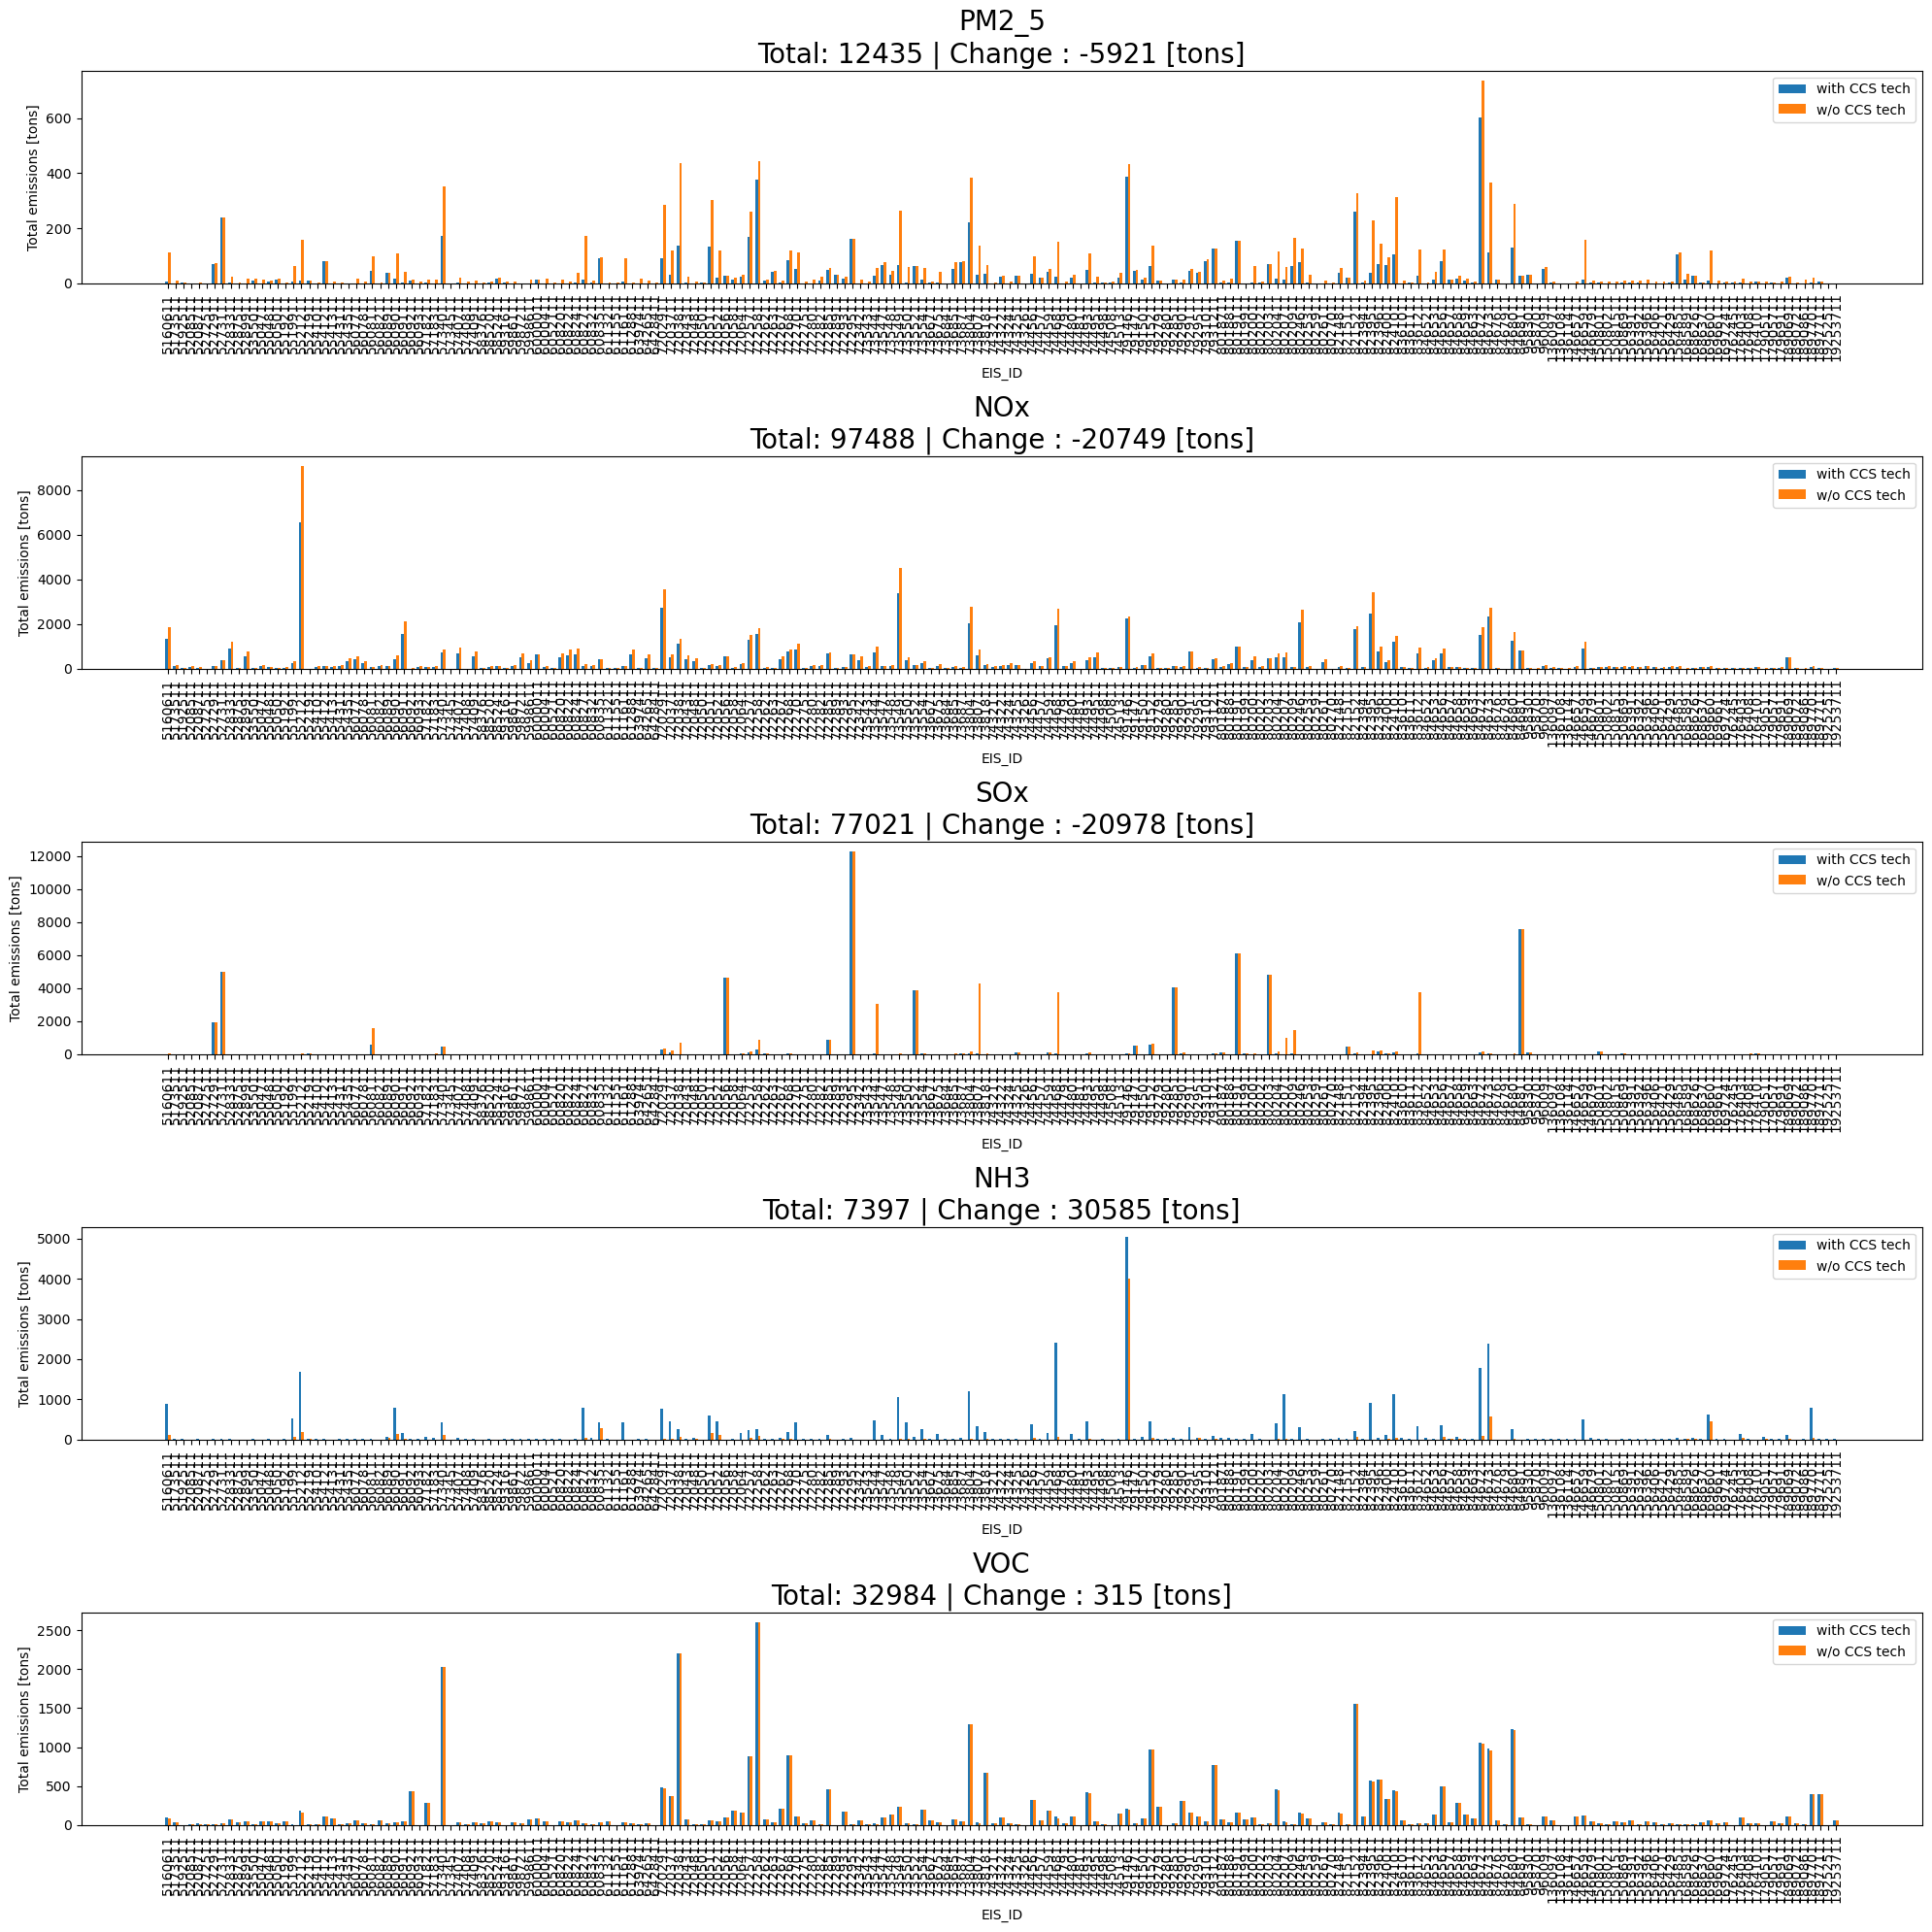

In [21]:
import numpy as np

# sum by FIPS
grouped_df = subset_df.drop(columns='geometry').groupby('EIS_ID').sum().reset_index()

pollutants = [ 'PM2_5' , 'NOx',  'SOx','NH3', 'VOC'] # 
pollutants_old = [f'{pollutant}_old' for pollutant in pollutants]

# Calculate total sums for each pollutant
totals = {pollutant: subset_df[pollutant].sum() for pollutant in pollutants_old}
totals_CCS ={pollutant: subset_df[pollutant].sum() for pollutant in pollutants}

# Plotting
fig, axes = plt.subplots(nrows=len(pollutants), ncols=1, figsize=(20, 20) ) #, sharey=True)
bar_width = 0.35  # Width of the bars
for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    indices = np.arange(len(grouped_df))
    # Plot CCS emissions
    ax.bar(indices, grouped_df[pollutant], bar_width, label=f'{pollutant}')
    
    # Plot NEI2020
    ax.bar(indices + bar_width, grouped_df[pollutants_old[i]], bar_width, label=f'{pollutants_old[i]}')
    
    total_original = totals[f'{pollutant}_old']
    total_new = totals_CCS[f'{pollutant}']
    ax.set_title(f'{pollutant}\nTotal: {total_original:.0f} | Change : {(total_new - total_original):.0f} [tons]', fontsize=20)
    ax.set_xlabel('EIS_ID')
    ax.set_ylabel('Total emissions [tons]')
    ax.set_xticks(indices + bar_width / 2)
    ax.set_xticklabels(grouped_df['EIS_ID'], rotation=90)
    ax.legend(["with CCS tech", "w/o CCS tech"])

plt.tight_layout()
plt.savefig(os.path.join(output_dir, f'Total_Difference.png'), dpi=300, bbox_inches='tight')

plt.show()

In [22]:
from IPython.display import display, Markdown

markdown_text = f"The number of facilties applied with the amine-based CCS technology is **{len(subset_df['EIS_ID'].unique())}**, which is all located in the CO state. "
                 
for i, pollutant in enumerate(pollutants):
    total_original = totals[f'{pollutant}_old']
    change = totals_CCS[f'{pollutant}'] - total_original

    # Use Markdown to display the computed value
    markdown_text +=f"For {pollutant}, the total NEI2020 emissions are **{total_original:.0f}** in tons, and it is changed by **{change:.0f}** with amine-based CCS technology. "


# Display the entire paragraph in one go
display(Markdown(markdown_text))

The number of facilties applied with the amine-based CCS technology is **213**, which is all located in the CO state. For PM2_5, the total NEI2020 emissions are **12435** in tons, and it is changed by **-5921** with amine-based CCS technology. For NOx, the total NEI2020 emissions are **97488** in tons, and it is changed by **-20749** with amine-based CCS technology. For SOx, the total NEI2020 emissions are **77021** in tons, and it is changed by **-20978** with amine-based CCS technology. For NH3, the total NEI2020 emissions are **7397** in tons, and it is changed by **30585** with amine-based CCS technology. For VOC, the total NEI2020 emissions are **32984** in tons, and it is changed by **315** with amine-based CCS technology. 

# Check a facility emissions from NEI inventory



In [23]:
import geopandas as gpd

# read base and sens emission scenarios
gdf_emis = gpd.read_file('/Users/yunhalee/Documents/LOCAETA/CS_emissions/Colorado_CCS_combined_NEI_point_oilgas_ptegu_ptnonimps.shp')

# Reset index to ensure proper comparison
gdf_emis.reset_index(drop=True, inplace=True)

# Apply CCS emissions to a facility of interest
facility_eis_id = {'Suncor':1099511 } # 'Cherokee':3555811 } 'Landfill': 2001411} # 
                   #'Suncor':1099511, } # 17445711} # Suncor frs_id = '1007923'
		# Cherokee plant alone (facility ID 1007207)  EIS_ID = 17445711
        # NEI emission without landfill facility ID 1007709

species_list = ['NOx', 'SOx', 'PM2_5'] # VOC and NH3 are excluded because the input emissions has NEI emissions for VOC and NH3. 

for key, id in facility_eis_id.items():

    if isinstance(id, int):
        print(f"{id} is integer")
    else:
        print(f"{id} must be integer")
        id = int(id)

    print(f"matching facility: {gdf_emis[gdf_emis['EIS_ID'] == id]}" )

    subset_df = gdf_emis[gdf_emis['EIS_ID'] == id]

subset_df[['PM2_5']].sum()

1099511 is integer
matching facility:          FIPS       SCC  VOC_old   NOx_old  NH3_old  SOx_old  PM2_5_old  \
119718  08001  10200701   8.6938  209.7100      0.0   5.5252    12.0281   
119719  08001  30103202   0.0500    0.9400      0.0  52.9000     0.0700   
119720  08001  30107103   5.2000    0.0000      0.0   0.0000     0.0000   
119721  08001  30600104   2.7600   42.0200      0.0   2.8200     3.9700   
119722  08001  30600106  24.2535  250.6707      0.0  19.3947    26.0017   
...       ...       ...      ...       ...      ...      ...        ...   
119783  08001  40700809   0.4058    0.0000      0.0   0.0000     0.0000   
119784  08001  40704801   0.9300    0.0000      0.0   0.0000     0.0000   
119785  08001  50410310   0.1114    5.8100      0.0   0.0000     0.0000   
119786  08001  50410314   0.0754    2.2600      0.0   0.0100     0.0900   
119787  08001  50410405   0.2900    0.0000      0.0   0.0000     0.0000   

         height     diam        temp  velocity   EIS_ID  ghgr

PM2_5    70.537739
dtype: float64

In [24]:
subset_df[['PM2_5_old']].sum()

PM2_5_old    114.932
dtype: float64

## Debugging NEI emissions (for duplicates)

Date : May 6, 2025 

Whole USA scenario, EIS_ID and SCC no longer a unquie identifier, so there are some duplicates, resulting in incorrect final NEI-CCS emissions. The script below is checking what causes the duplicates. 

In [25]:
import geopandas as gpd
import os

# LA_CCS and CO_CCS don't have the duplicates case for EIS_ID and SCC

# read base and sens emission scenarios
gdf_debug = gpd.read_file(
#  '/Users/yunhalee/Documents/LOCAETA/RCM/INMAP/evaldata_v1.6.1/2020_nei_emissions/combined_NEI2020_pt_oilgas_ptegu_ptnonipm.shp')
 '/Users/yunhalee/Documents/LOCAETA/CS_emissions/USA_point_CCS.shp')

debug_output_dir = '/Users/yunhalee/Documents/LOCAETA/LOCAETA_AQ/outputs/emissions/USA_CCS/'

# Reset index to ensure proper comparison
gdf_debug.reset_index(drop=True, inplace=True)

#print(gdf_debug[(gdf_debug['EIS_ID'].astype(int) == 715711) & (gdf_debug['SCC'].astype(int) == 10100601)]) 
#print(gdf_debug[(gdf_debug['EIS_ID'].astype(int) == 12611) & (gdf_debug['SCC'].astype(int) == 10200602)])  
print(gdf_debug[(gdf_debug['EIS_ID'].astype(int) == 6011511) & (gdf_debug['SCC'].astype(int) == 10100504)])   

# ptnonipm_2 has PM2_5 0.99218
# ptegu_1 has PM2_5 9.899564

       FIPS       SCC       VOC       NOx     NH3       SOx     PM2_5  \
1958  24017  10100504  0.008430  13.59140  1.2094  7.594300  0.194396   
1959  24017  10100504  0.001845   3.97610  0.0000  0.091285  0.042946   
1960  24017  10100504  0.048585   5.84995  0.0000  0.692435  0.355238   

       height    diam       temp  ...  PM25CON_re  NOX_out_su  SO2_out_su  \
1958  14.6304  6.7818  472.22222  ...    0.398802   16.860564     0.08378   
1959  14.6304  6.7818  472.22222  ...    0.398802   16.860564     0.08378   
1960  56.6928  1.5240  152.77778  ...    0.398802   16.860564     0.08378   

      PM25FIL_ou  PM25CON_ou  PM25_out_s  PM25_reduc  VOC_out_su  NH3_out_su  \
1958     0.00505    0.025455    0.030505    0.562074    2.964378  278.554295   
1959     0.00505    0.025455    0.030505    0.562074    2.964378  278.554295   
1960     0.00505    0.025455    0.030505    0.562074    2.964378  278.554295   

                          geometry  
1958  POINT (1722420.103 9071.085)  
195

In [26]:
# Identify duplicates
duplicate_keys = (
    gdf_debug.groupby(['EIS_ID', 'SCC'])
    .size()
    .reset_index(name='count')
    .query('count > 1')[['EIS_ID', 'SCC']]
)
duplicates = gdf_debug.merge(duplicate_keys, on=['EIS_ID', 'SCC'], how='inner')
duplicates['row_key'] = duplicates.index  # Track original index

# Case 1: Same EIS_ID, SCC, ghgrp_faci but different PM2_5
case1_keys = (
    duplicates.groupby(['EIS_ID', 'SCC', 'ghgrp_faci'])['PM2_5']
    .nunique()
    .reset_index(name='pm25_variety')
    .query('pm25_variety > 1')[['EIS_ID', 'SCC', 'ghgrp_faci']]
)
case1 = duplicates.merge(case1_keys, on=['EIS_ID', 'SCC', 'ghgrp_faci'])
case1_row_keys = set(case1['row_key'])

# Exclude Case 1 rows before doing Case 2
case_others = duplicates[~duplicates['row_key'].isin(case1_row_keys)]

# Case 2: Multiple ghgrp_faci for the same NEI (EIS_ID + SCC)
case2_keys = (
    case_others.groupby(['EIS_ID', 'SCC'])['ghgrp_faci']
    .nunique()
    .reset_index(name='ghgrp_faci_count')
    .query('ghgrp_faci_count > 1')[['EIS_ID', 'SCC']]
)
case2 = case_others.merge(case2_keys, on=['EIS_ID', 'SCC'])
case2_row_keys = set(case2['row_key'])

# Case 3: Remaining (All IDs are same but two subparts, C and D, results in different NH3/VOC increase)
remaining_row_keys = set(duplicates['row_key']) - case1_row_keys - case2_row_keys
case3 = duplicates[duplicates['row_key'].isin(remaining_row_keys)]

# Output
print(f"Total Duplicates: {len(duplicates)} rows")
print(f"Case 1: {len(case1)} rows")
print(f"Case 2: {len(case2)} rows")
print(f"Case 3: {len(case3)} rows")
print(f"Sum of all cases: {len(case1) + len(case2) + len(case3)} rows")


case1.to_csv(debug_output_dir + 'Case1_one_ghgrp_fac_multiple_NEI_duplicates.csv', index=False)
case2.to_csv(debug_output_dir + 'Case2_more_than_one_ghgrp_faci_per_NEI_duplicates.csv', index=False)
case3.to_csv(debug_output_dir + 'Case3_other_duplicates.csv', index=False)

Total Duplicates: 3344 rows
Case 1: 946 rows
Case 2: 2218 rows
Case 3: 180 rows
Sum of all cases: 3344 rows


In [27]:
3344/2

1672.0